# Predicting Mortality for COVID-19 Patients

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(9,6)}, font_scale = 1.5)

In [2]:
# Display raw data
df_375 = pd.read_excel(io = "time_series_375_preprocess_en.xlsx")

df_375

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,NaN,2020-02-16 11:21:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,NaN,2020-02-16 12:04:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,NaN,2020-02-16 12:14:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,105.2,...,NaN,NaN,267.0,NaN,139.3,NaN,NaN,17.0,88.6,77.0
6118,NaN,2020-02-16 14:11:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,155.0,NaN,...,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
all_biomarkers = ['age', 'gender', 'Hypersensitive cardiac troponinI', 'hemoglobin', 'Serum chloride', 'Prothrombin time', 'procalcitonin', \
                  'eosinophils(%)', 'Interleukin 2 receptor', 'Alkaline phosphatase', 'albumin', 'basophil(%)', 'Interleukin 10', \
                  'Total bilirubin', 'Platelet count', 'monocytes(%)', 'antithrombin', 'Interleukin 8', 'indirect bilirubin', \
                  'Red blood cell distribution width ', 'neutrophils(%)', 'total protein', 'Quantification of Treponema pallidum antibodies', \
                  'Prothrombin activity', 'HBsAg', 'mean corpuscular volume', 'hematocrit', 'White blood cell count', 'Tumor necrosis factorα', \
                  'mean corpuscular hemoglobin concentration', 'fibrinogen', 'Interleukin 1β', 'Urea', 'lymphocyte count', 'PH value', \
                  'Red blood cell count', 'Eosinophil count', 'Corrected calcium', 'Serum potassium', 'glucose', 'neutrophils count', \
                  'Direct bilirubin', 'Mean platelet volume', 'ferritin', 'RBC distribution width SD', 'Thrombin time', '(%)lymphocyte', \
                  'HCV antibody quantification', 'D-D dimer', 'Total cholesterol', 'aspartate aminotransferase', 'Uric acid', 'HCO3-', \
                  'calcium', 'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)', 'Lactate dehydrogenase', 'platelet large cell ratio ', \
                  'Interleukin 6', 'Fibrin degradation products', 'monocytes count', 'PLT distribution width', 'globulin', 'γ-glutamyl transpeptidase', \
                  'International standard ratio', 'basophil count(#)', '2019-nCoV nucleic acid detection', 'mean corpuscular hemoglobin ', \
                  'Activation of partial thromboplastin time', 'Hypersensitive c-reactive protein', 'HIV antibody quantification', \
                  'serum sodium', 'thrombocytocrit', 'ESR', 'glutamic-pyruvic transaminase', 'eGFR', 'creatinine']

### 1. Clean up the data

1. Group each patient using the Patient ID
2. Find the average value of each of their biomarkers
3. Remove patients with no data available

Resulting table is the data for each patient in a single row

In [27]:
patient_data = ['PATIENT_ID', 'outcome']
df = df_375.drop(['RE_DATE', 'Admission time', 'Discharge time'], axis=1)

# biomarkers = ['Hypersensitive cardiac troponinI', 'Prothrombin time', 'procalcitonin', '(%)lymphocyte', 'D-D dimer', 'Lactate dehydrogenase', 'Interleukin 6', 'Hypersensitive c-reactive protein']
# patient_data = ['PATIENT_ID', 'outcome']
# df = df_375.loc[:, patient_data + biomarkers]

# Fill up empty patient IDs
df['PATIENT_ID'] = df['PATIENT_ID'].ffill()
df = df.fillna(0)

# Find the average value of the biomarkers for each patient
df = df.groupby(patient_data)[all_biomarkers].apply(lambda x: x[x != 0].mean()).round(1).reset_index()
# df = df.groupby(patient_data)[biomarkers].apply(lambda x: x[x != 0].mean()).round(1).reset_index()


# Drop the patients with no biomarkers recorded
df = df.dropna(subset=df.columns.difference(['PATIENT_ID', 'outcome', 'age', 'gender']), how='all')

df

df_dead = df.loc[(df['outcome'] == 0)]
# iqr = df_dead.loc[:, 'Activation of partial thromboplastin time']

# Calculate the IQR for the selected row
# iqr1 = iqr.quantile(0.25)
# iqr3 = iqr.quantile(0.75)
mean = df_dead['Lactate dehydrogenase'].mean()

#'albumin', 'neutrophils(%)', '(%)lymphocyte', 'Lactate dehydrogenase',    'Activation of partial thromboplastin time']

# Print the IQR
print('Mean: ',mean)
# print('IQR: (', iqr1, '-', iqr3, ')')
# print(age_median)


Mean:  243.20569948186528


### 2. Replace missing values with the mean of the feature 

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df).round(1))

# Rename the features
df.columns = patient_data + all_biomarkers
# df.columns = patient_data + biomarkers


df

,PATIENT_ID,outcome,age,gender,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,0.0,73.0,1.0,19.9,133.2,100.2,13.5,0.1,0.8,...,32.1,38.4,16.4,0.1,140.5,0.2,41.0,29.2,66.7,99.0
1,2.0,0.0,61.0,1.0,6.9,145.8,99.3,13.3,0.1,0.1,...,32.0,39.2,27.4,0.1,138.2,0.3,40.0,29.0,90.4,79.2
2,3.0,0.0,70.0,2.0,766.0,115.7,101.4,13.6,0.1,0.2,...,31.8,34.8,23.0,0.1,139.8,0.2,47.5,56.7,83.9,63.7
3,4.0,0.0,74.0,1.0,4.8,98.0,101.9,16.3,0.4,2.1,...,41.7,40.9,61.4,0.1,141.0,0.2,72.0,23.0,78.1,84.5
4,5.0,0.0,29.0,2.0,5.6,128.0,101.0,14.6,0.0,2.2,...,29.9,40.9,3.9,0.1,141.9,0.3,13.0,15.0,121.4,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,371.0,1.0,63.0,1.0,1741.5,143.0,95.7,14.4,1.5,1.1,...,30.4,43.8,152.0,0.1,135.8,0.2,19.0,31.0,88.6,81.0
357,372.0,1.0,79.0,1.0,30.7,118.7,119.6,17.9,1.6,0.3,...,30.0,47.8,232.2,0.1,153.6,0.2,93.0,82.4,16.8,297.4
358,373.0,1.0,61.0,2.0,124.8,100.0,102.6,14.9,0.6,0.1,...,27.6,36.7,205.8,0.1,141.6,0.2,33.9,9.0,101.3,47.0
359,374.0,1.0,33.0,1.0,372.4,119.0,124.0,23.2,0.9,1.1,...,30.2,38.7,109.8,0.1,160.4,0.1,19.0,1061.0,80.9,109.3


### 3. Split the data

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

# Prepare features and targets
X = df.drop(['outcome', 'PATIENT_ID'], axis=1) # Features
y = df['outcome'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape: X_train={}, y_train={}".format(X_train.shape, y_train.shape))
print("Testing set shape: X_test={}, y_test={}".format(X_test.shape, y_test.shape))

Training set shape: X_train=(288, 76), y_train=(288,)
Testing set shape: X_test=(73, 76), y_test=(73,)


### 4. Conduct Feature Selection

#### Prepare the data for Feature Selection

In [7]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.preprocessing import StandardScaler

# Remove constant features
var_threshold = VarianceThreshold()
X_train_high_variance = var_threshold.fit_transform(X_train)
X_test_high_variance = var_threshold.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_high_variance)
X_test_scaled = scaler.transform(X_test_high_variance)

#### Feature Selection

In [15]:
# Feature selection with SelectKBest
k = 5
selector_kbest = SelectKBest(k=k)
X_train_kbest = selector_kbest.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector_kbest.transform(X_test_scaled)

# Get names of the selected features
selected_kbest = np.where(selector_kbest.get_support())[0]
print("Selected Features:")
print(X_train.columns[selected_kbest])

Selected Features:
Index(['albumin', 'neutrophils(%)', '(%)lymphocyte', 'Lactate dehydrogenase',
       'Activation of partial thromboplastin time'],
      dtype='object')


### 5. Function to be used for a desired classifier

In [9]:
def train_test_model (model, X, y, X_train, X_test, y_train, y_test):
    # Train model
    result = model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)

    # Perform k-fold cross-validation
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=42)    
    print('Cross Validation Scores: ', cross_val_score(model, X, y, cv=folds))

    # Compute ROC curve and AUC score
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    # Evaluate the model's performance
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
    print('Recall score: ', metrics.recall_score(y_test, y_pred))
    print('f1 score: ', metrics.f1_score(y_test, y_pred))
    print('precision score: ', metrics.precision_score(y_test, y_pred))


    # Display a confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    confusion_matrix.plot()
#     plt.title('Confusion Matrix')
    plt.show()
            
    return fpr, tpr, roc_auc, metrics.accuracy_score(y_test, y_pred)

### 6. Train and evaluate the model

#### Logistic regression

Cross Validation Scores:  [1.         1.         0.97222222 0.91666667 0.88888889 0.94444444
 0.94444444 0.94444444 0.97222222 0.83333333]
Accuracy:  0.9452054794520548
Recall score:  0.9666666666666667
f1 score:  0.9354838709677419
precision score:  0.90625


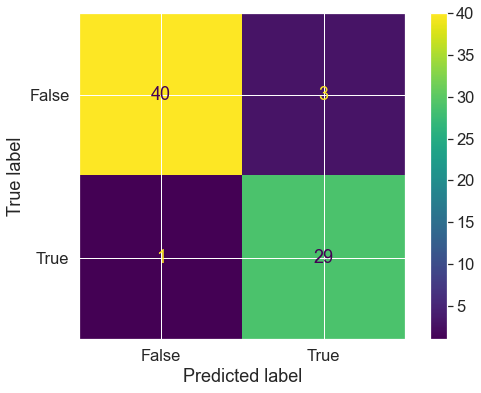

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000) 

lr_fpr, lr_tpr, lr_roc_auc, lr_accuracy = train_test_model(logreg, X, y, X_train_kbest, X_test_kbest, y_train, y_test)
# lr_fpr, lr_tpr, lr_roc_auc, lr_accuracy = train_test_model(logreg, X, y, X_train, X_test, y_train, y_test)

#### Support Vector Machine

Cross Validation Scores:  [0.78378378 0.83333333 0.83333333 0.77777778 0.80555556 0.80555556
 0.69444444 0.80555556 0.88888889 0.83333333]
Accuracy:  0.9315068493150684
Recall score:  0.9666666666666667
f1 score:  0.9206349206349207
precision score:  0.8787878787878788


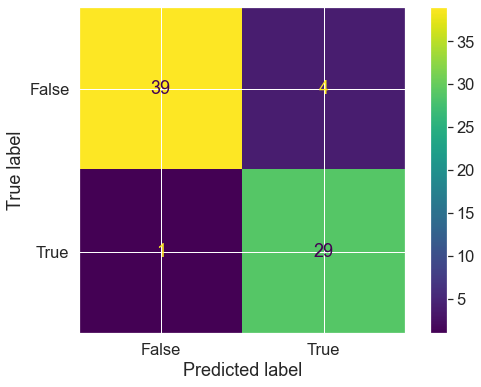

In [11]:
from sklearn.svm import SVC

svm = SVC()

svm_fpr, svm_tpr, svm_roc_auc, svm_accuracy = train_test_model(svm, X, y, X_train_kbest, X_test_kbest, y_train, y_test)
# svm_fpr, svm_tpr, svm_roc_auc, svm_accuracy = train_test_model(svm, X, y, X_train, X_test, y_train, y_test)

#### Random Forrest Classifier

Cross Validation Scores:  [0.97297297 1.         0.97222222 0.94444444 0.94444444 0.97222222
 0.97222222 1.         0.94444444 0.97222222]
Accuracy:  0.958904109589041
Recall score:  0.9666666666666667
f1 score:  0.9508196721311476
precision score:  0.9354838709677419


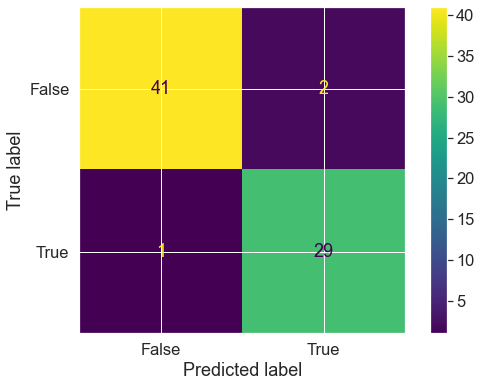

In [12]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import export_graphviz
# import graphviz
# from sklearn import tree

rf = RandomForestClassifier()

rf_fpr, rf_tpr, rf_roc_auc, rf_accuracy = train_test_model(rf, X, y, X_train_kbest, X_test_kbest, y_train, y_test)
# rf_fpr, rf_tpr, rf_roc_auc, rf_accuracy = train_test_model(rf, X, y, X_train, X_test, y_train, y_test)

# fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

# for i in range(0,5):
#     tree.plot_tree(rf.estimators_[0], 
#                     feature_names=['albumin', 'neutrophils(%)', '(%)lymphocyte', 'Lactate dehydrogenase',
#            'Activation of partial thromboplastin time'],
#                     ax = axes[i],
#                     filled=True)
#     axes[i].set_title('Estimator: ' + str(i), fontsize = 11)

# fig.savefig('rf_5trees.png')

### 7. Plot ROC curve

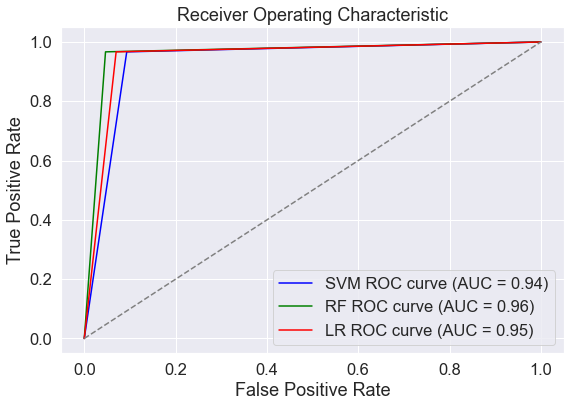

In [13]:
plt.plot(svm_fpr, svm_tpr, color='blue', label='SVM ROC curve (AUC = {:.2f})'.format(svm_roc_auc))
plt.plot(rf_fpr, rf_tpr, color='green', label='RF ROC curve (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot(lr_fpr, lr_tpr, color='red', label='LR ROC curve (AUC = {:.2f})'.format(lr_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [14]:
print('Logreg Accuracy:', lr_accuracy)
print('SVM Accuracy:', svm_accuracy)
print('Rand Forest Accuracy:', rf_accuracy)

Logreg Accuracy: 0.9452054794520548
SVM Accuracy: 0.9315068493150684
Rand Forest Accuracy: 0.958904109589041
